# Playground for Distance Metrics

- Stephen W. Thomas
- Used for MMA 869, MMAI 869, GMMA 869

In [1]:
import datetime
print(datetime.datetime.now())

2020-06-30 13:47:34.381267


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score, silhouette_samples

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# Default plot settings
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16


plt.rc('figure', figsize=[8.0, 5.0])     # controls the size of the figure
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('axes', grid=True)

# Distance Metrics for Simple Numeric Features

Let's make up some data and a nice plot for the slides

In [4]:
import scipy.spatial.distance as dist
import numpy as np
import itertools

# Prepare 3 vectors (data points) of 2 dimensions
points = pd.DataFrame(data={'id':['A', 'B', 'C'], 'dim1':[1, 2, 5], 'dim2':[1, 1, 5]})
display(points.head())

,id,dim1,dim2
0,A,1,1
1,B,2,1
2,C,5,5


In [5]:
for combo in itertools.combinations(points['id'], 2):
    v1 = points[points['id'] == combo[0]][['dim1', 'dim2']]
    v2 = points[points['id'] == combo[1]][['dim1', 'dim2']]
    
    print('\nPoints {} and {}:'.format(combo[0], combo[1]))
    print('Euclidean distance: {:.2f}'.format(dist.euclidean(v1, v2)))
    print('Manhattan distance: {:.2f}'.format(dist.cityblock(v1, v2)))
    print('Chebyshev distance: {:.2f}'.format(dist.chebyshev(v1, v2)))
    print('Canberra distance: {:.2f}'.format(dist.canberra(v1, v2)))
    print('Cosine distance: {:.2f}'.format(dist.cosine(v1, v2)))
    


Points A and B:
Euclidean distance: 1.00
Manhattan distance: 1.00
Chebyshev distance: 1.00
Canberra distance: 0.33
Cosine distance: 0.05

Points A and C:
Euclidean distance: 5.66
Manhattan distance: 8.00
Chebyshev distance: 4.00
Canberra distance: 1.33
Cosine distance: 0.00

Points B and C:
Euclidean distance: 5.00
Manhattan distance: 7.00
Chebyshev distance: 4.00
Canberra distance: 1.10
Cosine distance: 0.05


<Figure size 720x720 with 0 Axes>

Text(0.5, 0, 'Feature 1')

Text(0, 0.5, 'Feature 2')

(array([0., 1., 2., 3., 4., 5., 6.]), <a list of 7 Text xticklabel objects>)

(array([0., 1., 2., 3., 4., 5., 6.]), <a list of 7 Text yticklabel objects>)

(0, 6)

(0, 6)

Text(1, 1, 'A')

Text(2, 1, 'B')

Text(5, 5, 'C')

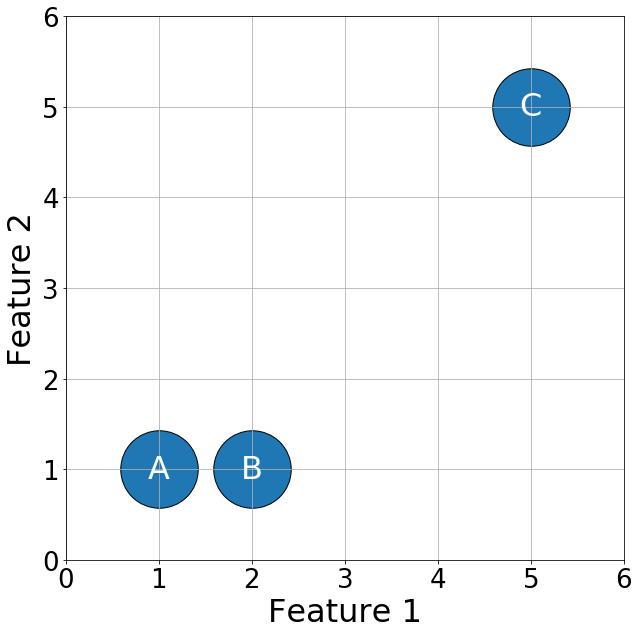

In [6]:
plt.figure(figsize=(10, 10));
plt.grid(True);

plt.scatter(points['dim1'], points['dim2'], s=6000, marker='o', edgecolors='black');
#plt.title("Distances", fontsize=20);
plt.xlabel('Feature 1', fontsize=32);
plt.ylabel('Feature 2', fontsize=32);
plt.xticks(fontsize=26);
plt.yticks(fontsize=26);
plt.xlim(left=0, right=6);
plt.ylim(bottom=0, top=6);

for i, txt in enumerate(points['id']):
    plt.text(x=points['dim1'].iloc[i], y=points['dim2'].iloc[i], s=txt, fontsize=32, 
             horizontalalignment='center', verticalalignment='center', color='white');

# Distance Metrics and Categorical Data

How do we deal with categorical features? Standard distance metrics like Euclidean don't work. 

We have a number of options:

- Encode the categorical features (such as one hot encoding (i.e., dummy variables), ordinal encoding, label encoding, contrast encoding) and then using regular distance metrics
- Use a categorical-aware distance metric, like Jaccard, Dice, or Hamming
- Use a categorical-aware algorithm, like k-mediods/k-modes

In [7]:
df = pd.read_csv("https://raw.githubusercontent.com/stepthom/869_course/main/data/bank.csv")

# drop the target feature; not needed for clustering
df = df.drop(['y'], axis=1)

df.shape
df.info()
df.head(n=10)

(4521, 16)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
dtypes: int64(7), object(9)
memory usage: 565.2+ KB


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure


In [8]:
# Descriptive stats of the numeric features
df.describe(include=[np.number]).transpose()

,count,mean,std,min,25%,50%,75%,max
age,4521.0,41.170095,10.576211,19.0,33.0,39.0,49.0,87.0
balance,4521.0,1422.657819,3009.638142,-3313.0,69.0,444.0,1480.0,71188.0
day,4521.0,15.915284,8.247667,1.0,9.0,16.0,21.0,31.0
duration,4521.0,263.961292,259.856633,4.0,104.0,185.0,329.0,3025.0
campaign,4521.0,2.793630,3.109807,1.0,1.0,2.0,3.0,50.0
pdays,4521.0,39.766645,100.121124,-1.0,-1.0,-1.0,-1.0,871.0
previous,4521.0,0.542579,1.693562,0.0,0.0,0.0,0.0,25.0


In [9]:
# Descriptive stats of the categorical features
df.describe(include=[np.object]).transpose()

,count,unique,top,freq
job,4521,12,management,969
marital,4521,3,married,2797
education,4521,4,secondary,2306
default,4521,2,no,4445
housing,4521,2,yes,2559
loan,4521,2,no,3830
contact,4521,3,cellular,2896
month,4521,12,may,1398
poutcome,4521,4,unknown,3705


In [10]:
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols]
cat_cols = df.select_dtypes(include=np.object).columns
df[cat_cols]

,age,balance,day,duration,campaign,pdays,previous
0,30,1787,19,79,1,-1,0
1,33,4789,11,220,1,339,4
2,35,1350,16,185,1,330,1
3,30,1476,3,199,4,-1,0
4,59,0,5,226,1,-1,0
...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0
4517,57,-3313,9,153,1,-1,0
4518,57,295,19,151,11,-1,0
4519,28,1137,6,129,4,211,3


,job,marital,education,default,housing,loan,contact,month,poutcome
0,unemployed,married,primary,no,no,no,cellular,oct,unknown
1,services,married,secondary,no,yes,yes,cellular,may,failure
2,management,single,tertiary,no,yes,no,cellular,apr,failure
3,management,married,tertiary,no,yes,yes,unknown,jun,unknown
4,blue-collar,married,secondary,no,yes,no,unknown,may,unknown
...,...,...,...,...,...,...,...,...,...
4516,services,married,secondary,no,yes,no,cellular,jul,unknown
4517,self-employed,married,tertiary,yes,yes,yes,unknown,may,unknown
4518,technician,married,secondary,no,no,no,cellular,aug,unknown
4519,blue-collar,married,secondary,no,no,no,cellular,feb,other


In [11]:
from sklearn.preprocessing import StandardScaler

# Isolate all the numeric features, and scale them

X_num = df[numeric_cols].to_numpy()
X_num.shape

scaler = StandardScaler()
X_num = scaler.fit_transform(X_num)
X_num

(4521, 7)

array([[-1.05626965,  0.12107186,  0.37405206, ..., -0.57682947,
        -0.4072183 , -0.32041282],
       [-0.77258281,  1.1186443 , -0.59602646, ..., -0.57682947,
         2.98904408,  2.04173372],
       [-0.58345826, -0.02414438,  0.01027262, ..., -0.57682947,
         2.89914302,  0.27012381],
       ...,
       [ 1.49691189, -0.37472364,  0.37405206, ...,  2.63916021,
        -0.4072183 , -0.32041282],
       [-1.24539421, -0.09492484, -1.20232553, ...,  0.38796743,
         1.71045119,  1.45119709],
       [ 0.26760226, -0.09525714, -1.56610497, ..., -0.2552305 ,
         2.09003345,  3.81334363]])

## Encoding the Categorical Features

In [25]:
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np
from sklearn.preprocessing import StandardScaler
import scipy

# Here is a cool function to take an encoded version of the categorial features, along with scaled version of the numeric features and do the following:
# Appened the two sets into one 2-D array
# For a given example instance, find and print the 5 closest instances, and the 5 furthest instances
def find_closest_and_furthest(X_num, X1, example_idx=4):
    
    X_new = np.concatenate((X1, X_num), axis=1)
    
    ds = euclidean_distances(X_new, X_new)

    print('Sample instance, orig:')
    display(df.iloc[[example_idx]])
    print('Sample instance, encoded and scaled:')
    display(X_new[example_idx, :])

    indices_min = np.argsort(ds[example_idx,:])[0:5]
    indices_max = np.argsort(ds[example_idx,:])[-5:]

    print('\nThe indices of the 5 closest instances:')
    print(indices_min)

    print('\nThe distance values of of the 5 closest instances:')
    print(ds[example_idx, indices_min])

    print('\nThe 5 closest instances, orig:')
    display(df.iloc[indices_min])

    print('\nThe 5 closest instances, encoded and scaled:')
    display(X_new[indices_min, :])


    print('\nThe indices of the 5 furthest instances:')
    print(indices_max)

    print('\nThe distance values of of the 5 furthest instances:')
    print(ds[example_idx, indices_max])

    print('\nThe 5 furthest instances, orig:')
    display(df.iloc[indices_max])

    print('\nThe 5 furthest instances, encoded and scaled:')
    display(X_new[indices_max, :])

In [26]:
from sklearn.preprocessing import OneHotEncoder

# OHE
enc = OneHotEncoder(handle_unknown='ignore')

X1 = enc.fit_transform(df[cat_cols])
X1 = X1.toarray()

find_closest_and_furthest(X_num, X1, example_idx=4)

Sample instance, orig:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown


Sample instance, encoded and scaled:


array([ 0.    ,  1.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  1.    ,
        0.    ,  0.    ,  1.    ,  0.    ,  0.    ,  1.    ,  0.    ,
        0.    ,  1.    ,  1.    ,  0.    ,  0.    ,  0.    ,  1.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  1.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  1.    ,  1.686 , -0.4728, -1.3236, -0.1461, -0.5768,
       -0.4072, -0.3204])


The indices of the 5 closest instances:
[   4  982 1392  543 3809]

The distance values of of the 5 closest instances:
[0.     0.6567 1.0358 1.2026 1.2327]

The 5 closest instances, orig:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown
982,54,blue-collar,married,secondary,no,1291,yes,no,unknown,5,may,266,1,-1,0,unknown
1392,52,blue-collar,married,secondary,no,-98,yes,no,unknown,7,may,423,1,-1,0,unknown
543,48,blue-collar,married,secondary,no,157,yes,no,unknown,6,may,73,1,-1,0,unknown
3809,52,blue-collar,married,secondary,no,161,yes,no,unknown,13,may,274,2,-1,0,unknown



The 5 closest instances, encoded and scaled:


array([[ 0.    ,  1.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  1.    ,
         0.    ,  0.    ,  1.    ,  0.    ,  0.    ,  1.    ,  0.    ,
         0.    ,  1.    ,  1.    ,  0.    ,  0.    ,  0.    ,  1.    ,
         0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ,  1.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ,  1.    ,  1.686 , -0.4728, -1.3236, -0.1461, -0.5768,
        -0.4072, -0.3204],
       [ 0.    ,  1.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  1.    ,
         0.    ,  0.    ,  1.    ,  0.    ,  0.    ,  1.    ,  0.    ,
         0.    ,  1.    ,  1.    ,  0.    ,  0.    ,  0.    ,  1.    ,
         0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ,  1.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ,  1.    ,  1.2132, -0.0438, -1.323


The indices of the 5 furthest instances:
[4080 3426 4397 2504 3700]

The distance values of of the 5 furthest instances:
[14.5224 14.7246 15.7337 16.4259 23.867 ]

The 5 furthest instances, orig:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
4080,40,blue-collar,married,primary,no,2805,yes,no,cellular,14,may,173,6,353,23,failure
3426,40,self-employed,married,primary,no,2077,yes,no,cellular,13,may,363,1,173,24,other
4397,35,blue-collar,married,secondary,no,305,yes,no,cellular,18,may,7,7,367,25,failure
2504,35,blue-collar,married,secondary,no,280,yes,yes,cellular,31,jul,65,50,-1,0,unknown
3700,60,retired,married,primary,no,71188,no,no,cellular,6,oct,205,1,-1,0,unknown



The 5 furthest instances, encoded and scaled:


array([[ 0.    ,  1.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  1.    ,
         0.    ,  1.    ,  0.    ,  0.    ,  0.    ,  1.    ,  0.    ,
         0.    ,  1.    ,  1.    ,  0.    ,  1.    ,  0.    ,  0.    ,
         0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ,  1.    ,  0.    ,  0.    ,  0.    ,  1.    ,  0.    ,
         0.    ,  0.    , -0.1106,  0.4594, -0.2322, -0.3501,  1.0312,
         3.1289, 13.2619],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  1.    ,
         0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  1.    ,
         0.    ,  1.    ,  0.    ,  0.    ,  0.    ,  1.    ,  0.    ,
         0.    ,  1.    ,  1.    ,  0.    ,  1.    ,  0.    ,  0.    ,
         0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ,  1.    ,  0.    ,  0.    ,  0.    ,  0.    ,  1.    ,
         0.    ,  0.    , -0.1106,  0.2174, -0.353

In [15]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()

X2 = enc.fit_transform(df[cat_cols])
find_closest_and_furthest(X_num, X2, example_idx=4)

Sample instance, orig:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown


Sample instance, encoded and scaled:


array([ 1.        ,  1.        ,  1.        ,  0.        ,  1.        ,
        0.        ,  2.        ,  8.        ,  3.        ,  1.68603644,
       -0.47275291, -1.32358535, -0.14610168, -0.57682947, -0.4072183 ,
       -0.32041282])


The indices of the 5 closest instances:
[   4  982 1392   26 2257]

The distance values of of the 5 closest instances:
[0.         0.65672971 1.03580594 1.09225271 1.10199267]

The 5 closest instances, orig:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown
982,54,blue-collar,married,secondary,no,1291,yes,no,unknown,5,may,266,1,-1,0,unknown
1392,52,blue-collar,married,secondary,no,-98,yes,no,unknown,7,may,423,1,-1,0,unknown
26,55,blue-collar,married,primary,no,627,yes,no,unknown,5,may,247,1,-1,0,unknown
2257,55,blue-collar,married,secondary,no,383,no,no,unknown,5,may,287,1,-1,0,unknown



The 5 closest instances, encoded and scaled:


array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         2.00000000e+00,  8.00000000e+00,  3.00000000e+00,
         1.68603644e+00, -4.72752908e-01, -1.32358535e+00,
        -1.46101681e-01, -5.76829470e-01, -4.07218298e-01,
        -3.20412822e-01],
       [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         2.00000000e+00,  8.00000000e+00,  3.00000000e+00,
         1.21322505e+00, -4.37502371e-02, -1.32358535e+00,
         7.84637951e-03, -5.76829470e-01, -4.07218298e-01,
        -3.20412822e-01],
       [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         2.00000000e+00,  8.00000000e+00,  3.00000000e+00,
         1.02410049e+00, -5.05318564e-01, -1.08106572e+00,
         6.12092516e-01, -5.76829470e-01, -4.07218298e-01,
        -3.20412822e-01],
       [ 1.00000000e+00,  1.00000000e


The indices of the 5 furthest instances:
[3426 2989 4397 2504 3700]

The distance values of of the 5 furthest instances:
[15.58252093 15.93844139 16.01719984 16.66759313 24.1998872 ]

The 5 furthest instances, orig:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
3426,40,self-employed,married,primary,no,2077,yes,no,cellular,13,may,363,1,173,24,other
2989,42,entrepreneur,married,tertiary,no,42045,no,no,cellular,8,aug,205,2,-1,0,unknown
4397,35,blue-collar,married,secondary,no,305,yes,no,cellular,18,may,7,7,367,25,failure
2504,35,blue-collar,married,secondary,no,280,yes,yes,cellular,31,jul,65,50,-1,0,unknown
3700,60,retired,married,primary,no,71188,no,no,cellular,6,oct,205,1,-1,0,unknown



The 5 furthest instances, encoded and scaled:


array([[ 6.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  8.        ,  1.        , -0.11064686,
         0.21743962, -0.35350683,  0.38117043, -0.57682947,  1.33086892,
        13.85246644],
       [ 2.        ,  1.        ,  2.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  3.        ,  0.0784777 ,
        13.49891038, -0.9598059 , -0.22692441, -0.2552305 , -0.4072183 ,
        -0.32041282],
       [ 1.        ,  1.        ,  1.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  8.        ,  0.        , -0.58345826,
        -0.37140061,  0.25279225, -0.98896731,  1.35276434,  3.26873628,
        14.44300308],
       [ 1.        ,  1.        ,  1.        ,  0.        ,  1.        ,
         1.        ,  0.        ,  5.        ,  3.        , -0.58345826,
        -0.37970818,  1.82916984, -0.76574262, 15.18151997, -0.4072183 ,
        -0.32041282],
       [ 5.        ,  1.        ,  0

## Hamming, Jaccard, Dice, etc. Distance

The main idea here would be to use a "normal" distance metric on the (scaled) numeric features, and a categorical-friendly distance metric on the categocial features, and then combine the distance scores using e.g., weighted average.

Let's explore what these distances look like for a coouple of instaces, then we'll get serious with some scores.

In [18]:
from scipy.spatial import distance

def compare_instances(idx1, idx2, X1, X_num):
    np.set_printoptions(precision=2)
    print('Numeric Features of Instance {:>5}: {}'.format(idx1, X_num[idx1]))
    print('Numeric Features of Instance {:>5}: {}'.format(idx2, X_num[idx2]))
    print()
    print('Euclidean distance:   {:.2f}'.format(distance.euclidean(X_num[idx1,:], X_num[idx2,:])))
    print('Cosine distance:      {:.2f}'.format(distance.cosine(X_num[idx1,:], X_num[idx2,:])))
    print('Cityblock distance:   {:.2f}'.format(distance.cityblock(X_num[idx1,:], X_num[idx2,:])))
    print('Chebyshev distance:   {:.2f}'.format(distance.chebyshev(X_num[idx1,:], X_num[idx2,:])))
    print('Minkowski distance:   {:.2f}'.format(distance.minkowski(X_num[idx1,:], X_num[idx2,:])))
    
    print()
    print()
    print('Categorical Features of Instance {:>5}: {}'.format(idx1, X1[idx1]))
    print('Categorical Features of Instance {:>5}: {}'.format(idx2, X1[idx2]))
    print()
    print('Hamming distance:   {:.2f}'.format(distance.hamming(X1[idx1,:], X1[idx2,:])))
    print('Jaccard distance:   {:.2f}'.format(distance.jaccard(X1[idx1,:], X1[idx2,:])))


In [19]:
X1 = df[cat_cols].to_numpy()
X_new = np.concatenate((X1, X_num), axis=1)

compare_instances(0, 100, X1, X_num)

Numeric Features of Instance     0: [-1.06  0.12  0.37 -0.71 -0.58 -0.41 -0.32]
Numeric Features of Instance   100: [-0.49 -0.47 -1.2   0.28 -0.58 -0.41 -0.32]

Euclidean distance:   2.04
Cosine distance:      0.83
Cityblock distance:   3.73
Chebyshev distance:   1.58
Minkowski distance:   2.04


Categorical Features of Instance     0: ['unemployed' 'married' 'primary' 'no' 'no' 'no' 'cellular' 'oct'
 'unknown']
Categorical Features of Instance   100: ['blue-collar' 'married' 'secondary' 'no' 'yes' 'no' 'unknown' 'may'
 'unknown']

Hamming distance:   0.56
Jaccard distance:   0.56


In [20]:
compare_instances(0, 2400, X1, X_num)

Numeric Features of Instance     0: [-1.06  0.12  0.37 -0.71 -0.58 -0.41 -0.32]
Numeric Features of Instance  2400: [ 0.17 -0.44  0.13  0.26 -0.58 -0.41 -0.32]

Euclidean distance:   1.68
Cosine distance:      0.84
Cityblock distance:   3.00
Chebyshev distance:   1.23
Minkowski distance:   1.68


Categorical Features of Instance     0: ['unemployed' 'married' 'primary' 'no' 'no' 'no' 'cellular' 'oct'
 'unknown']
Categorical Features of Instance  2400: ['self-employed' 'married' 'secondary' 'no' 'no' 'no' 'unknown' 'jun'
 'unknown']

Hamming distance:   0.44
Jaccard distance:   0.44


In [21]:
compare_instances(100, 2400, X1, X_num)

Numeric Features of Instance   100: [-0.49 -0.47 -1.2   0.28 -0.58 -0.41 -0.32]
Numeric Features of Instance  2400: [ 0.17 -0.44  0.13  0.26 -0.58 -0.41 -0.32]

Euclidean distance:   1.49
Cosine distance:      0.58
Cityblock distance:   2.05
Chebyshev distance:   1.33
Minkowski distance:   1.49


Categorical Features of Instance   100: ['blue-collar' 'married' 'secondary' 'no' 'yes' 'no' 'unknown' 'may'
 'unknown']
Categorical Features of Instance  2400: ['self-employed' 'married' 'secondary' 'no' 'no' 'no' 'unknown' 'jun'
 'unknown']

Hamming distance:   0.33
Jaccard distance:   0.33


# Handle both Numeric and Catgorical Features

In [60]:
# Now, let's define our own function to handle both types of features

def custom_dist(x1, x2, cat_cols=None, num_cols=None):
   
    # First, isolate categorical features from numeric
    if cat_cols is None:
        cat_cols = [type(x)==str for x in x1]
    if num_cols is None:
        num_cols = [not x for x in cat_cols]
    
    n = len(x1)
    #print(x1)
    #print(x2)

    dist_num = distance.euclidean(x1[num_cols], x2[num_cols])
    #print(dist_num)
    dist_cat = distance.hamming(x1[cat_cols], x2[cat_cols])
    #print(dist_cat)
    
    dist = (dist_num*sum(num_cols) + dist_cat*sum(cat_cols)) / n
    #print(dist)
    return dist

In [57]:
np.set_printoptions(precision=4)

cat_cols = [type(x)==str for x in X_new[1,:]]
num_cols = [not x for x in cat_cols]

# We expect these to be pretty close
custom_dist(X_new[4,:], X_new[4,:], cat_cols, num_cols)
custom_dist(X_new[4,:], X_new[982,:], cat_cols, num_cols)
custom_dist(X_new[4,:], X_new[1392,:], cat_cols, num_cols)
custom_dist(X_new[4,:], X_new[26,:], cat_cols, num_cols)


# We expect these to be pretty far
custom_dist(X_new[4,:], X_new[3700,:], cat_cols, num_cols)
custom_dist(X_new[4,:], X_new[2504,:], cat_cols, num_cols)
custom_dist(X_new[4,:], X_new[4397,:], cat_cols, num_cols)
custom_dist(X_new[4,:], X_new[3426,:], cat_cols, num_cols)

0.0

0.28731924848145607

0.45316509767068874

0.2547094338546567

10.662260807623229

7.293457113336377

6.952673423373075

6.57206360089351

In [61]:
from scipy.spatial.distance import pdist

# Warning: pdist is kind of slow
Y = pdist(X_new[1:500,:], custom_dist, cat_cols=cat_cols, num_cols=num_cols)

In [62]:
import scipy.cluster

aggl = scipy.cluster.hierarchy.linkage(Y, method='ward')

In [63]:
aggl

array([[3.4000e+01, 4.1900e+02, 1.5057e-01, 2.0000e+00],
       [1.7000e+02, 2.7600e+02, 1.6793e-01, 2.0000e+00],
       [8.8000e+01, 4.2700e+02, 1.7109e-01, 2.0000e+00],
       ...,
       [9.7400e+02, 9.9200e+02, 1.0459e+01, 2.8200e+02],
       [9.9300e+02, 9.9400e+02, 1.1313e+01, 4.1700e+02],
       [9.9000e+02, 9.9500e+02, 1.6601e+01, 4.9900e+02]])

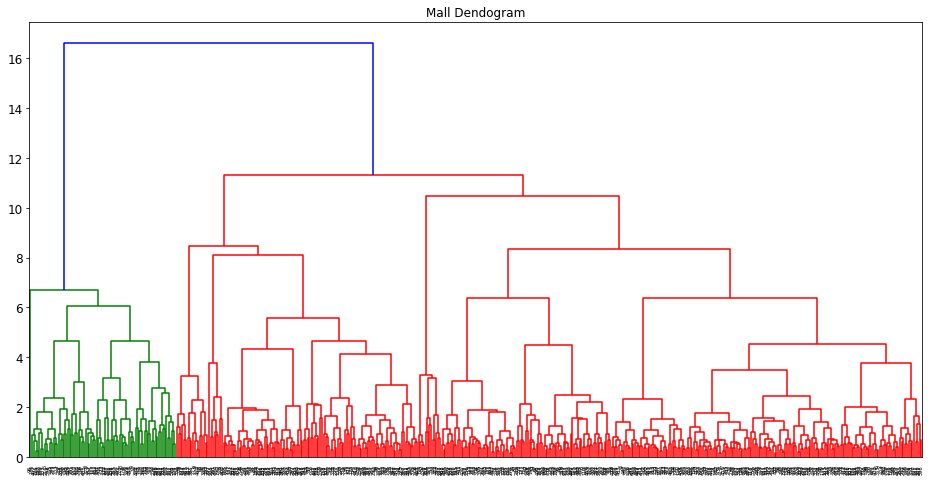

In [64]:
# Plot the dendogram 0 this time with better labels
plt.figure(figsize=(16, 8));
plt.grid(False)
plt.title("Mall Dendogram");  
dend = scipy.cluster.hierarchy.dendrogram(aggl); 